🎯 Desafio dia 83 — Reservas em Hotel

📂 Dataset: desafio_dia_83_reservas_hotel.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Um hotel deseja compreender melhor o perfil dos hóspedes e os padrões de reserva ao longo da semana. Seu papel é analisar os dados e construir um modelo preditivo para auxiliar nas estratégias de marketing e atendimento.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em num_noites com a média.

- Preencha os valores ausentes em avaliacao_hospede com a mediana.

📊 Análise geral
- Qual é o tipo de quarto mais reservado?

- Qual o número médio de noites reservadas por meio de reserva?

📈 Visualização de dados
- Crie um gráfico de barras horizontal com o número de reservas por dia da semana (dia_checkin).

🤖 Machine Learning - Regressão
- Crie um modelo para prever a avaliacao_hospede com base em:

dia_checkin, tipo_quarto, meio_reserva, num_noites

Utilize:

train_test_split

get_dummies

RandomForestRegressor

Avalie o desempenho com mean_squared_error.



In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("desafio_dia_83_reservas_hotel.csv")
df.head()

,id_reserva,dia_checkin,tipo_quarto,meio_reserva,num_noites,avaliacao_hospede
0,1,Quarta,Suíte,App,1.0,3.0
1,2,Segunda,Luxo,App,7.0,3.0
2,3,Segunda,Luxo,Telefone,1.0,2.0
3,4,Segunda,Suíte,Site,7.0,3.0
4,5,Segunda,Standard,Site,7.0,4.0


In [4]:
#Preencha os valores ausentes em num_noites com a média.
df["num_noites"] = df["num_noites"].fillna(df["num_noites"].mean())
df["num_noites"].isna().sum()

0

In [5]:
#Preencha os valores ausentes em avaliacao_hospede com a mediana.
df["avaliacao_hospede"] = df["avaliacao_hospede"].fillna(df["avaliacao_hospede"].median())
df["avaliacao_hospede"].isna().sum()

0

In [6]:
#Qual é o tipo de quarto mais reservado?
quarto_mais_reservado = df["tipo_quarto"].value_counts()
print(quarto_mais_reservado)

tipo_quarto
Executivo    136
Suíte        125
Luxo         125
Standard     114
Name: count, dtype: int64


In [13]:
#Qual o número médio de noites reservadas por meio de reserva?
media_noites_por_meio_reserva = df.groupby("meio_reserva")["num_noites"].mean()
print(media_noites_por_meio_reserva.round(2))

meio_reserva
Agência     4.59
App         4.33
Site        3.92
Telefone    3.76
Name: num_noites, dtype: float64


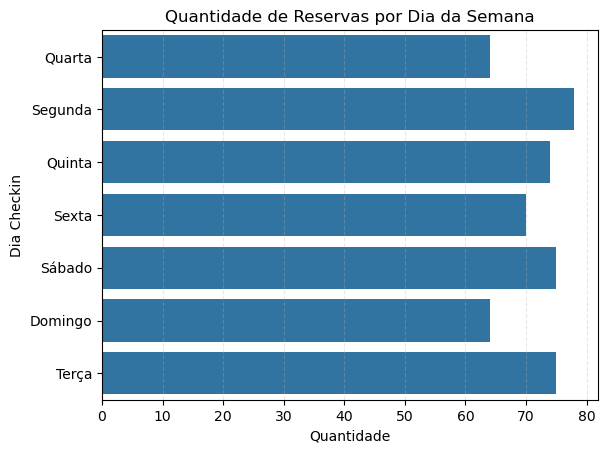

In [22]:
#Crie um gráfico de barras horizontal com o número de reservas por dia da semana (dia_checkin).
sns.countplot(df, y="dia_checkin")
plt.title("Quantidade de Reservas por Dia da Semana")
plt.ylabel("Dia Checkin")
plt.xlabel("Quantidade")
plt.grid(axis="x", linestyle="--", alpha=0.3)

In [26]:
#Crie um modelo para prever a avaliacao_hospede com base em:
X = df[["dia_checkin", "tipo_quarto", "meio_reserva", "num_noites"]]
y = df["avaliacao_hospede"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_pred, y_test).

1.4
